# FISH - Data interpretation - A Python interactive notebook to interpret FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.

```

### Notebook summary 


- Load a directory with data quantified by FISH_pipeline.ipynb
- Establish a connection to Network-attached storage (NAS) using [pysmb](https://github.com/miketeo/pysmb)
- Compares quantifications for multiple conditions in a single plot
- Compares mRNA spots in the  nucleus, cytosol and the comple cell.
  
----

<img src= /home/luisub/Desktop/FISH_Processing/docs/images/code_architecture.png alt="drawing" width="1000"/>

## Importing libraries

In [43]:
import sys
import matplotlib.pyplot as plt 
from  matplotlib.ticker import FuncFormatter
import numpy as np 
import pandas as pd
import pathlib
import warnings
import glob
import seaborn as sns
import zipfile
import shutil
import scipy.stats as stats
warnings.filterwarnings("ignore")

## Defining paths

In [44]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa
# Local folder path
local_folder_path = pathlib.Path().absolute().joinpath('temp_zip_analyses')
local_folder_path
# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
# Connection to munsky-nas
path_to_config_file = desktop_path.joinpath('config.yml')
share_name = 'share'

## List of folders to process

In [45]:
def A549_COX2(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20220914/A549_COX2_woSTM_GoldMedia' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220914/A549_COX2_30ngmL_IL1B_2h_GoldMedia'  )
    list_labels = [ 'COX2_wo','COX2_2h_30ng_ILB']
    plot_title_suffix= "COX2"
    mandatory_substring = mandatory_substring      #'nuc_90__cyto_200__psfz_350__psfyx_110__ts_500'
    return list_dirs, list_labels, plot_title_suffix, mandatory_substring

In [46]:
def A549_COX2(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20220914/A549_COX2_woSTM_GoldMedia'  )
    list_labels = [ 'COX2_wo']
    plot_title_suffix= "COX2"
    mandatory_substring = mandatory_substring      #'nuc_90__cyto_200__psfz_350__psfyx_110__ts_500'
    return list_dirs, list_labels, plot_title_suffix, mandatory_substring

In [47]:
# New data

In [48]:
    
def A549_NFKB_AB_488_IKBA(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20221027/A549_NFKB_AB_488_IKBA-Cy5_woSTM',
    'smFISH_images/Linda_smFISH_images/Confocal/20221031/A549_NFKB_AB_488_IKBA-Cy5_IL-1B_20min_woDEX_B1', 
    'smFISH_images/Linda_smFISH_images/Confocal/20221027/A549_NFKB_AB_488_IKBA-Cy5_IL-1B_60min_woDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20221031/A549_NFKB_AB_488_IKBA-Cy5_DEX_60min_woIL-1B_A2',
    'smFISH_images/Linda_smFISH_images/Confocal/20221031/A549_NFKB_AB_488_IKBA-Cy5_DEX_120min_woIL-1B_A3',
    'smFISH_images/Linda_smFISH_images/Confocal/20221031/A549_NFKB_AB_488_IKBA-Cy5_IL-1B_20min_DEX_60min_B2',
    'smFISH_images/Linda_smFISH_images/Confocal/20221101/A549_NFKB_AB_488_IKBA-Cy5_IL-1B_20min_DEX_120min_B3', 
    'smFISH_images/Linda_smFISH_images/Confocal/20221101/A549_NFKB_AB_488_IKBA-Cy5_IL-1B_60min_DEX_60min_C2', 
    'smFISH_images/Linda_smFISH_images/Confocal/20221101/A549_NFKB_AB_488_IKBA-Cy5_IL-1B_60min_DEX_120min_C3')
    
    list_labels = [ 'woSTM','IL1B_20min','IL1B_60min', 'DEX_60min','DEX_120min','DEX_60min_IL1B_20min','DEX120min_IL1B_20min','DEX_60min_IL1B_60min','DEX_120min_IL1B_60min']
    plot_title_suffix= "A549_NFKB_AB_488_IKBA"
    mandatory_substring = mandatory_substring      # 'nuc_90__cyto_200__psfz_350__psfyx_160__ts_auto'  # 'nuc_90__cyto_200__psfz_350__psfyx_120__ts_500'
    return list_dirs, list_labels, plot_title_suffix, mandatory_substring


In [49]:
def A549_NFKB_AB_488_COX2(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20221102/A549_NFKB_AB_488_COX2-Cy5_IL-1B_60min_woDEX_A4',
    'smFISH_images/Linda_smFISH_images/Confocal/20221102/A549_NFKB_AB_488_COX2-Cy5_IL-1B_60min_DEX_60min_B4',
    'smFISH_images/Linda_smFISH_images/Confocal/20221102/A549_NFKB_AB_488_COX2-Cy5_IL-1B_60min_DEX_120min_C4')
    list_labels = [ 'IL1B_60min','IL1B_60min_DEX_60min','IL1B_60min_DEX_120min']
    plot_title_suffix= "A549_NFKB_AB_488_COX2"
    mandatory_substring = mandatory_substring      # 'nuc_90__cyto_200__psfz_350__psfyx_160__ts_auto'
    return list_dirs, list_labels, plot_title_suffix, mandatory_substring

In [50]:
def A549_NFKBIA(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20220927/A549_NFKBIA_woSTM',
    'smFISH_images/Linda_smFISH_images/Confocal/20220927/A549_NFKBIA_10minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220927/A549_NFKBIA_20minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_30minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_40minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_50minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_60minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_75minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_90minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_120minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220928/A549_NFKBIA_150minDEX',
    'smFISH_images/Linda_smFISH_images/Confocal/20220930/A549_NFKBIA_180minDEX')
    list_labels = [ 'woSTM','10minDEX','20minDEX','30minDEX','40minDEX','50minDEX','60minDEX','75minDEX','90minDEX','120minDEX','150minDEX','180minDEX']
    plot_title_suffix= "A549_NFKBIA"
    mandatory_substring = mandatory_substring      # 'nuc_80__cyto_200__psfz_350__psfyx_160__ts_auto'
    return list_dirs, list_labels, plot_title_suffix, mandatory_substring


----

# Running the codes

----

In [51]:
# To download data from NAS it is necessary to use CSU network or use the CSU VPN.
#list_dirs, list_labels, plot_title_suffix, mandatory_substring = A549_COX2(mandatory_substring='nuc_90__cyto_200__psfz_350__psfyx_110__ts_300')

#list_dirs, list_labels, plot_title_suffix, mandatory_substring = A549_NFKB_AB_488_IKBA(mandatory_substring='nuc_90__cyto_200__psfz_350__psfyx_120__ts_500')
#list_dirs, list_labels, plot_title_suffix, mandatory_substring = A549_NFKB_AB_488_COX2(mandatory_substring='nuc_90__cyto_200__psfz_350__psfyx_120__ts_500')
list_dirs, list_labels, plot_title_suffix, mandatory_substring = A549_NFKBIA(mandatory_substring='nuc_90__cyto_200__psfz_350__psfyx_120__ts_500')

minimal_TS_size = 3 # Just for the plotting
connect_to_NAS = True


## Connecting to NAS and extracting data

In [52]:
if connect_to_NAS == True:
    # Reading the data from NAS, unziping files, organizing data as single dataframe for comparison. 
    list_local_files = fa.Utilities.read_zipfiles_from_NAS(list_dirs,path_to_config_file,share_name, mandatory_substring, local_folder_path)
    list_local_folders = fa.Utilities.unzip_local_folders(list_local_files,local_folder_path)
else: 
    list_local_folders = list_dirs # Use this line to process files from a local repository
# Extracting data from each repository
list_spots_total, list_spots_nuc, list_spots_cytosol, list_number_cells, list_transcription_sites,list_cell_size = fa.Utilities.extracting_data_for_each_df_in_directory(  list_local_folders=list_local_folders,current_dir=current_dir,minimal_TS_size=minimal_TS_size)
# Final dataframes for nuc, cyto and total spots
df_all = fa.Utilities.convert_list_to_df (list_number_cells, list_spots_total, list_labels, remove_extreme_values= True)
df_cyto = fa.Utilities.convert_list_to_df (list_number_cells, list_spots_cytosol, list_labels, remove_extreme_values= True)
df_nuc = fa.Utilities.convert_list_to_df (list_number_cells, list_spots_nuc, list_labels, remove_extreme_values= True)
df_transcription_sites = fa.Utilities.convert_list_to_df (list_number_cells, list_transcription_sites, list_labels, remove_extreme_values= False)

Connection established
Connection established
Files downloaded to: /home/luisub/Desktop/FISH_Processing/notebooks/temp_zip_analyses/analysis_A549_NFKBIA_woSTM___nuc_90__cyto_200__psfz_350__psfyx_120__ts_500.zip
Connection established
Connection established
Files downloaded to: /home/luisub/Desktop/FISH_Processing/notebooks/temp_zip_analyses/analysis_A549_NFKBIA_10minDEX___nuc_90__cyto_200__psfz_350__psfyx_120__ts_500.zip
Connection established
Connection established
Files downloaded to: /home/luisub/Desktop/FISH_Processing/notebooks/temp_zip_analyses/analysis_A549_NFKBIA_20minDEX___nuc_90__cyto_200__psfz_350__psfyx_120__ts_500.zip
Connection established
Connection established
Files downloaded to: /home/luisub/Desktop/FISH_Processing/notebooks/temp_zip_analyses/analysis_A549_NFKBIA_30minDEX___nuc_90__cyto_200__psfz_350__psfyx_120__ts_500.zip
Connection established
Connection established
Files downloaded to: /home/luisub/Desktop/FISH_Processing/notebooks/temp_zip_analyses/analysis_A549_N

In [53]:
print('number of cells in each dataset: ', list_number_cells)

number of cells in each dataset:  [288, 289, 264, 277, 308, 280, 288, 305, 307, 291, 304, 325]


## Plotting

In [54]:
# creating a folder to store all plots
destination_folder = pathlib.Path().absolute().joinpath('results', 'dist_'+plot_title_suffix+'__'+mandatory_substring)

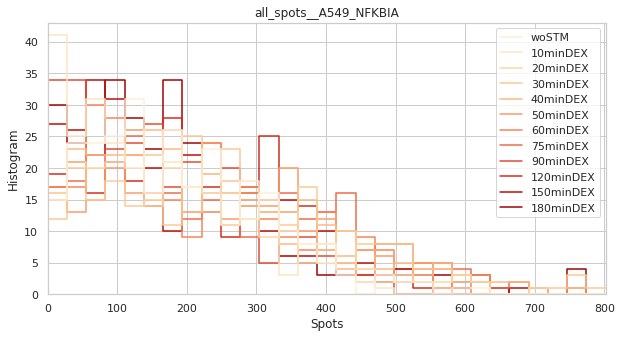

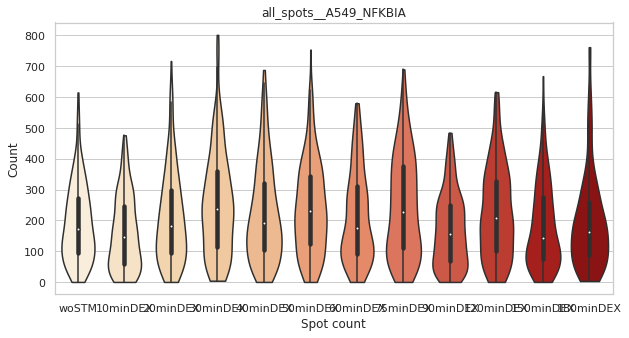

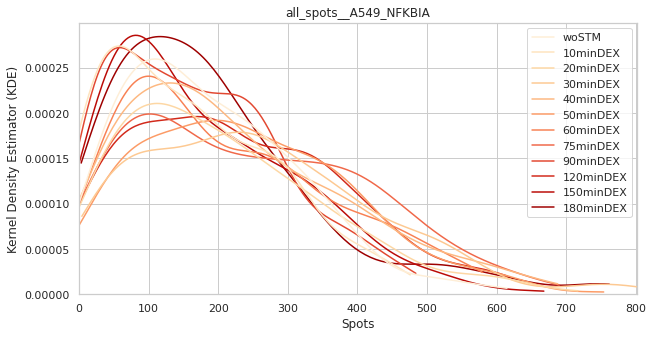

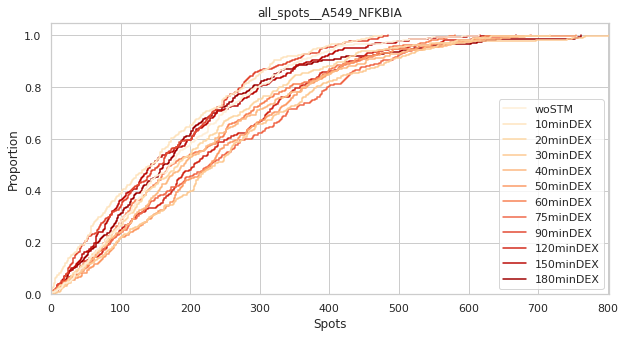

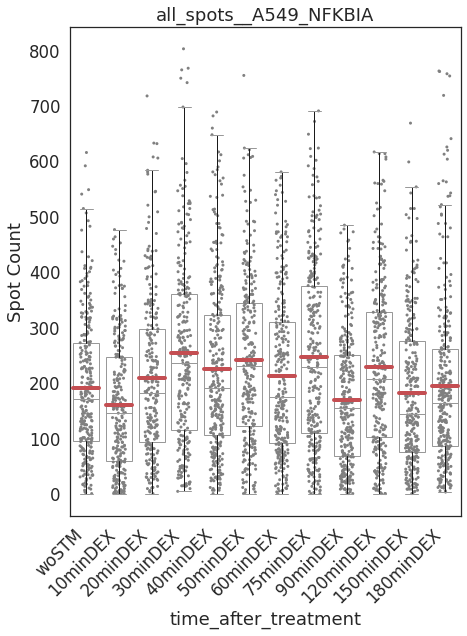

In [55]:
# Plotting for cytosol and nucleus
plot_title_complete = 'all_spots__'+plot_title_suffix
fa.dist_plots(df_all, plot_title_complete, destination_folder)

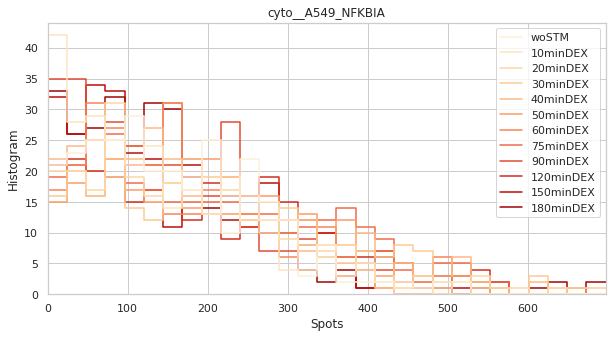

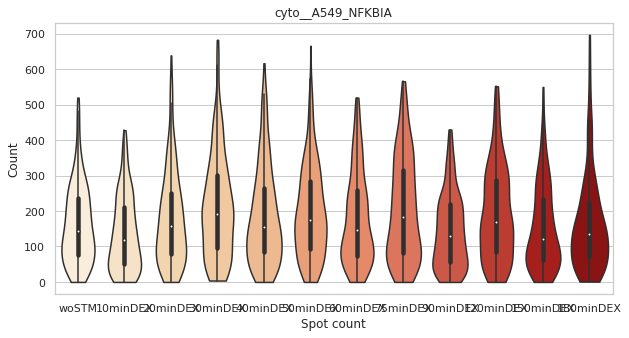

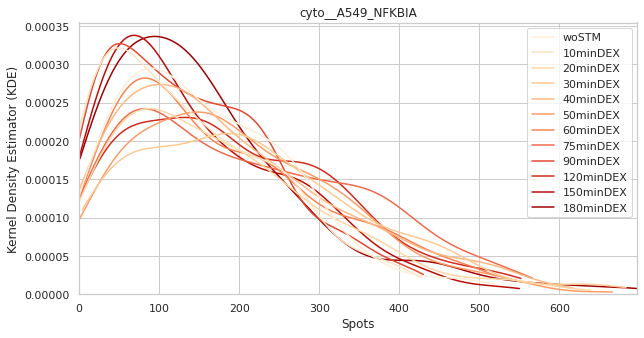

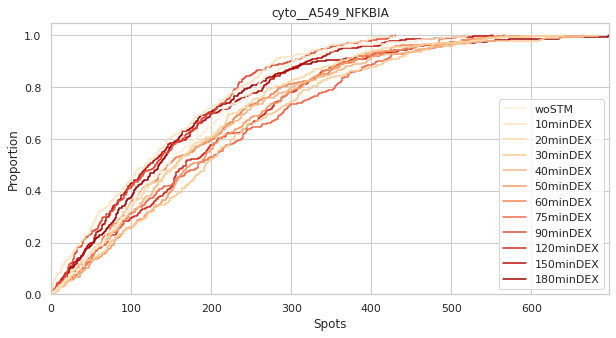

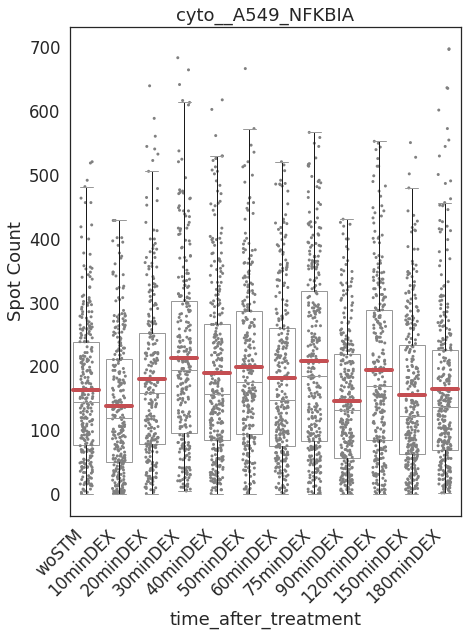

In [56]:
# Plotting for all Cytosol only
plot_title_cyto = 'cyto__'+plot_title_suffix
fa.dist_plots(df_cyto, plot_title_cyto, destination_folder)

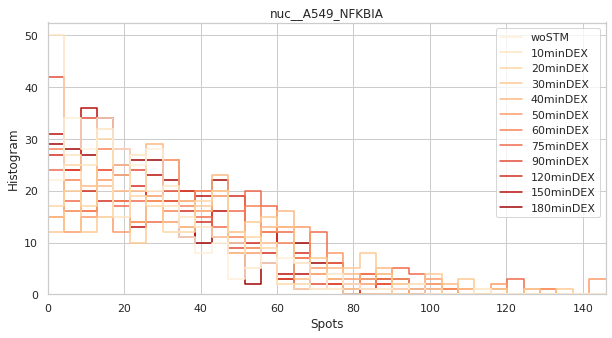

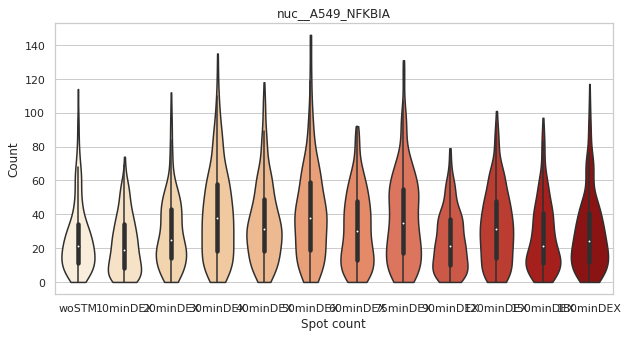

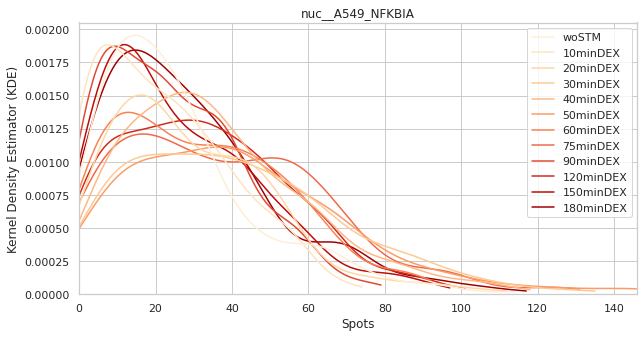

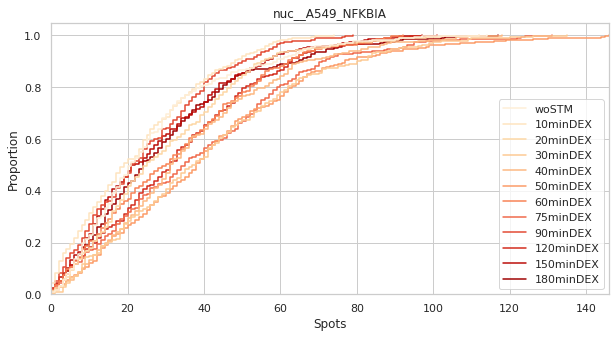

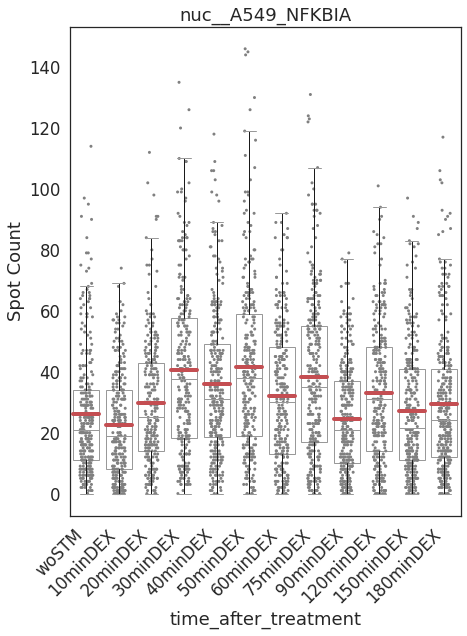

In [57]:
# Plotting for all nucleus
plot_title_nuc = 'nuc__'+plot_title_suffix
fa.dist_plots(df_nuc, plot_title_nuc, destination_folder)

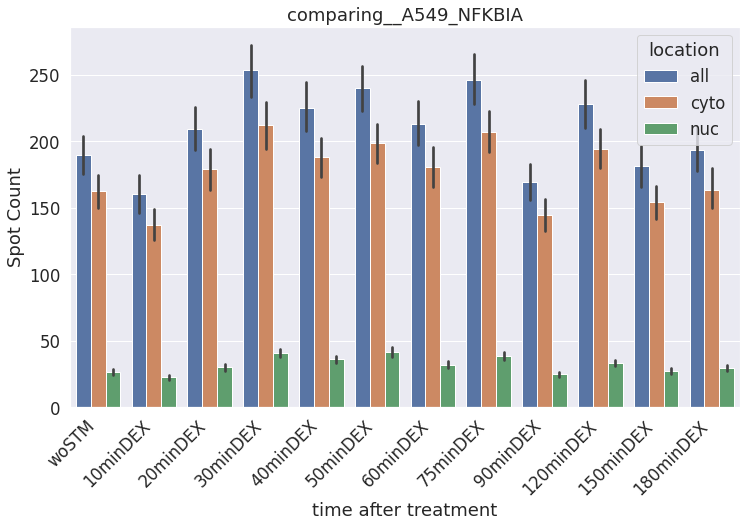

In [58]:
# Plot that compares nuc, cyto, and spots in all cell.
plot_title_comparing = 'comparing__'+plot_title_suffix
fa.plot_comparing_df(df_all,df_cyto,df_nuc,plot_title_comparing,destination_folder)

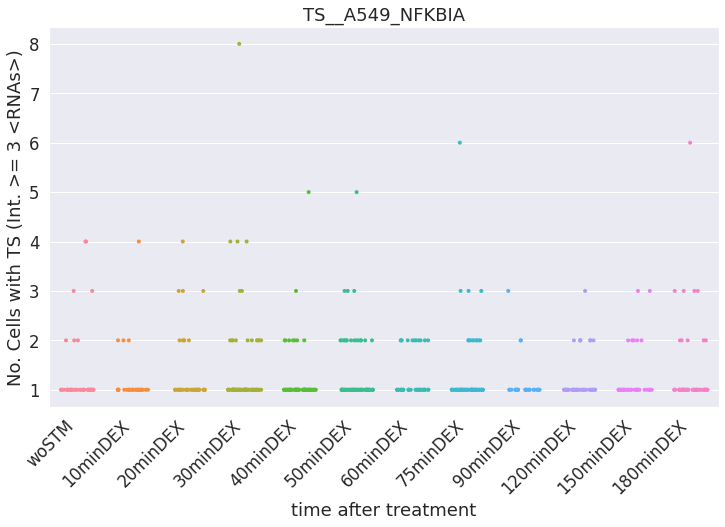

In [59]:
# Plotting for TS
plot_title = 'TS__'+plot_title_suffix
fa.plot_TS(df_transcription_sites,plot_title,destination_folder,minimal_TS_size,remove_zeros=True)

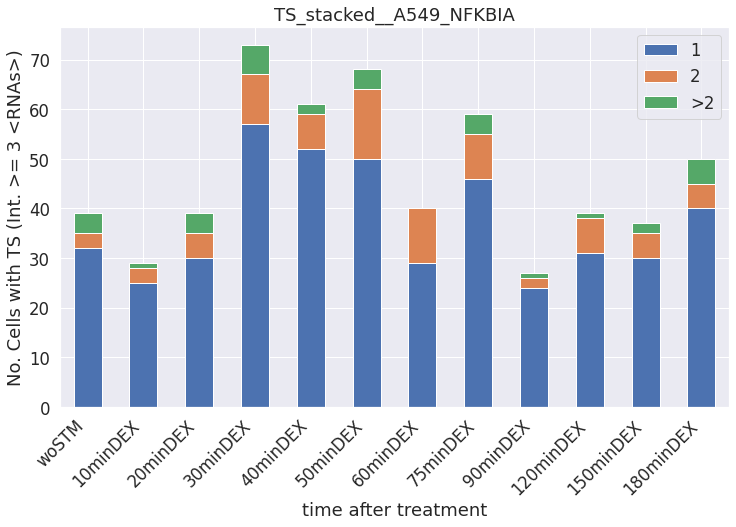

In [60]:
plot_title = 'TS_stacked__'+plot_title_suffix
fa.plot_TS_bar_stacked(df_transcription_sites,plot_title,destination_folder,minimal_TS_size,remove_zeros=True)

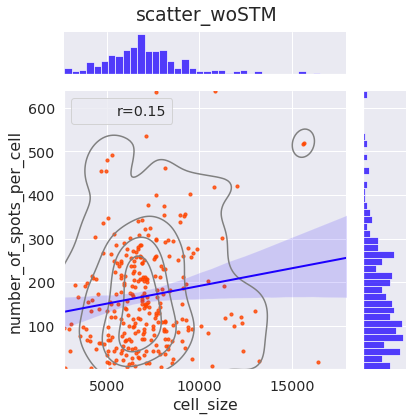

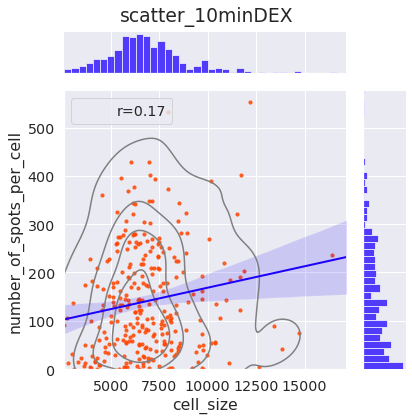

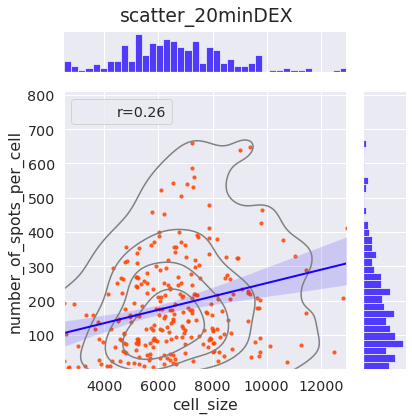

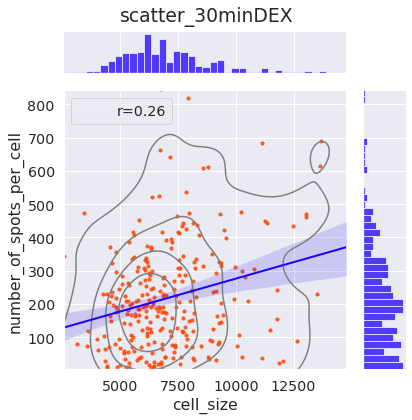

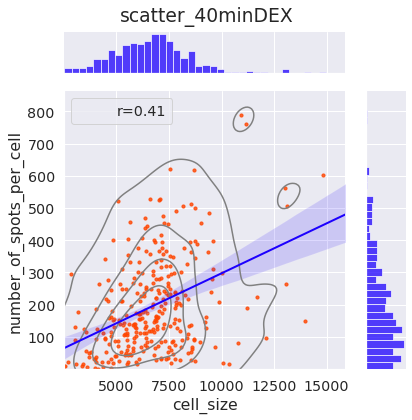

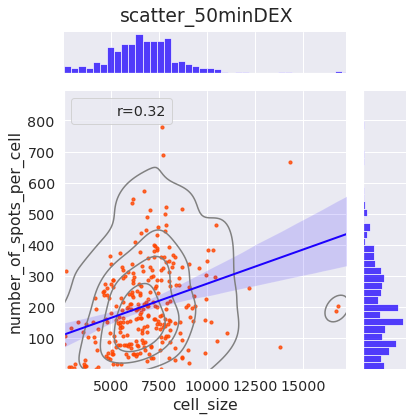

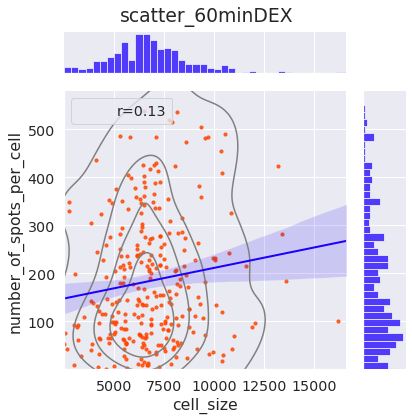

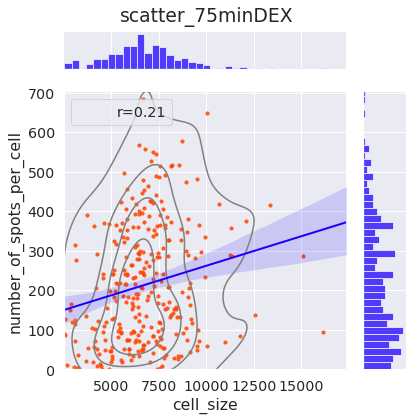

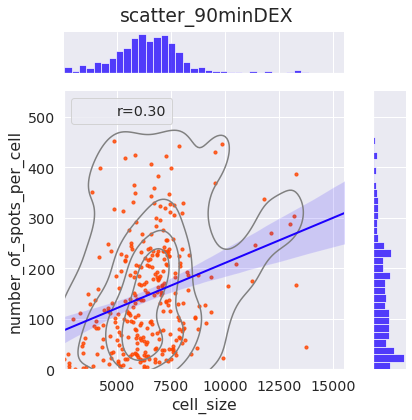

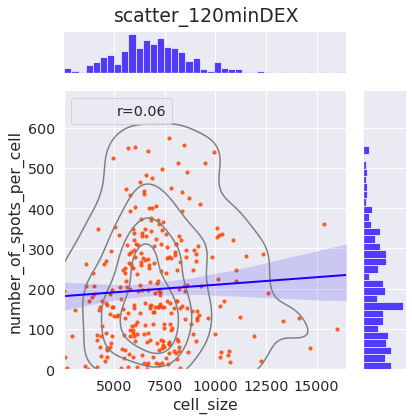

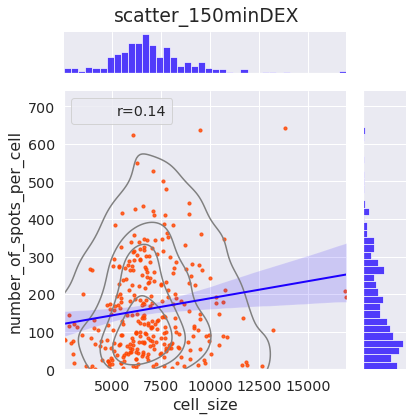

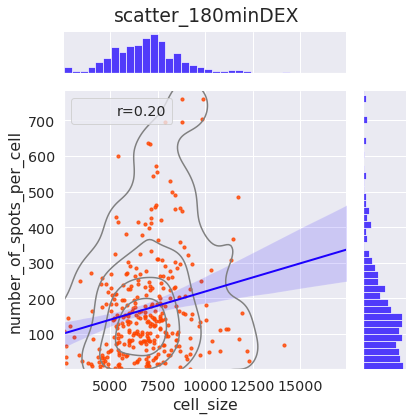

In [61]:
number_conditions = len(list_cell_size)
for i in range(len(list_labels)):
    x= list_cell_size[i]
    y = list_spots_cytosol[i]
    title_plot='scatter_'+list_labels[i]
    fa.plot_scatter_spots_cell_size(x,y,title_plot,destination_folder)

# Converting Dataframe to use in Brian's Matlab code.

In [62]:
# Exporting data to CSV. 
# ColumnA = time, 
# ColumnB= #RNA in nucleus, 
# ColumnC = #RNA in cytoplasm, 
# ColumnD = total RNA).
num_time_points = len(list_spots_total)
num_columns = 4 # time, RNA_nuc, RNA_cyto, total
array_data_spots =  np.empty(shape=(0, num_columns))

for i in range(0, num_time_points):
    num_cells = len(list_spots_total[i])
    temp_array_data_spots = np.zeros((num_cells,num_columns))
    temp_array_data_spots[:,0] = i
    temp_array_data_spots[:,1] = list_spots_nuc[i] # nuc
    temp_array_data_spots[:,2] = list_spots_cytosol[i] # cyto
    temp_array_data_spots[:,3] = list_spots_total[i] # all spots
    array_data_spots = np.append(array_data_spots, temp_array_data_spots, axis=0)
array_data_spots.shape

# final data frame with format for the model
df_for_model = pd.DataFrame(data=array_data_spots, columns =['time_index', 'RNA_nuc','RNA_cyto','RNA_total'] )
new_dtypes = {'time_index':int, 'RNA_nuc':int, 'RNA_cyto':int,'RNA_total':int}
df_for_model = df_for_model.astype(new_dtypes)

# Save to csv
df_for_model.to_csv(pathlib.Path().absolute().joinpath(destination_folder,plot_title_suffix+'.csv'))

In [63]:
# remove temporary folder
shutil.rmtree(local_folder_path)